0       1.29255
1       1.29394
2       1.30042
3       1.30722
4       1.30756
         ...   
2043    1.16583
2044    1.16667
2045    1.16297
2046    1.16654
2047    1.17171
Name: Close, Length: 2048, dtype: float64


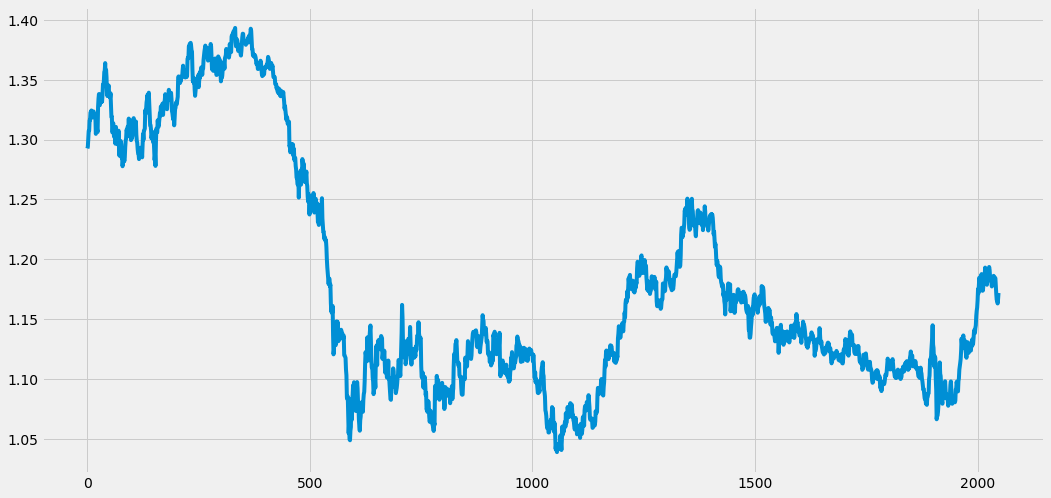

In [58]:
#descritpiin de prediction de prix de fermetuer d forex EURO/usd
 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
 
dt=web.DataReader('EURUSD=X',data_source='yahoo',start='2003-01-01',end='2020-09-29')
dt=pd.read_csv("EURUSD1440.csv")
print(dt['Close'])
plt.figure(figsize=(16,8))
plt.plot(dt['Close'])
plt.show()

In [59]:
data=dt.filter(['Close'])
datset=data.values
training_data_len=math.ceil((len(datset)*0.8))

In [60]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(datset)

scaled_data


array([[0.71588922],
       [0.71980935],
       [0.73808449],
       ...,
       [0.35044278],
       [0.36051103],
       [0.37509166]])

In [61]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]

for i in range(60,len(train_data)) :
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])


In [62]:
x_train,y_train=np.array(x_train),np.array(y_train)


In [63]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape


(1579, 60, 1)

In [64]:
model = Sequential()
model.add(LSTM(150,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(150,return_sequences=False,))
model.add(Dense(20))
model.add(Dense(1))

In [65]:
model.compile(optimizer='adam',loss='mean_squared_error')



In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
1579/1579 [==============================] - 80s 51ms/step - loss: 0.0027
Epoch 2/10
1041/1579 [==================>...........] - ETA: 27s - loss: 0.0011

In [ ]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=datset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions )


In [ ]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
valid['openn']=dt['Open']
valid['date']=dt['Date']
valid['high']=dt['High']
valid['low']=dt['Low']






plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close prce')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['train','Val','Predictions'],loc='lower right'  )
plt.show()

In [ ]:
print(valid)

In [ ]:
#apple_qute=web.DataReader('EURUSD=X',data_source='yahoo',start='2003-01-01',end='2020-09-30')
#print('the price  of the day opened is ',dt['Open'][-1],'the price  of the day closed is ',dt['Close'][-1])
new_df=dt.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print('price predict is : ',pred_price)
#print('the price of the next day is by open',web.DataReader('AAPL',data_source='yahoo',start='2020-09-17',end='2020-09-17')['Open'],'the price of the next day is by close',web.DataReader('AAPL',data_source='yahoo',start='2020-09-17',end='2020-09-17')['Close'])